In [1]:
import pandas as pd

dados = pd.read_csv('Customer-Churn.csv')
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [2]:
# modificação de forma manual
traducao_dic = {'Sim': 1,
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [3]:
# transformação automatizada pela função get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

#converter para inteiros
dummie_dados = dummie_dados.astype(int)

# junção dos dados transformados com o que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70,1,0,...,1,0,0,0,1,0,0,1,0,0


a partir das informações que já temos, as características dos outros clientes 
podemos trabalhar com essas informações e conseguir prever qual é o Churn de um determinado cliente. 
Seja ele um Churn não, não saiu da empresa ou Churn sim, ela saiu da empresa. 

### <span style="color:pink; font-weight:bold"> Informações para classificação</span>

X = inputs (dados de entrada)  
y = outputs (dados de saída)

In [4]:
# aparecer todas as colunas
pd.set_option('display.max_columns',39)

In [5]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


o nosso Y é aquela variável classificadora, o dado de saída, é o no Churn, o nosso Y1.  
Que também pode ser YN, Y1, Y2 e assim por diante. Já que o Y é uma variável de saída,  
um dado de saída pode dizer da seguinte forma, temos o conjunto X e Y, o Y é o resultado  
de uma função desconhecida que a máquina irá aprender com o algoritmo e aplicar aos nossos  
dados X. Y é resultado dessa função desconhecida aplicada ao X.

Para verificarmos se a nossa base de dados está desbalanceada,  
vamos gerar um gráfico que apresenta a distribuição dos valores da nossa variável classificadora "Churn":

In [6]:
!pip install seaborn

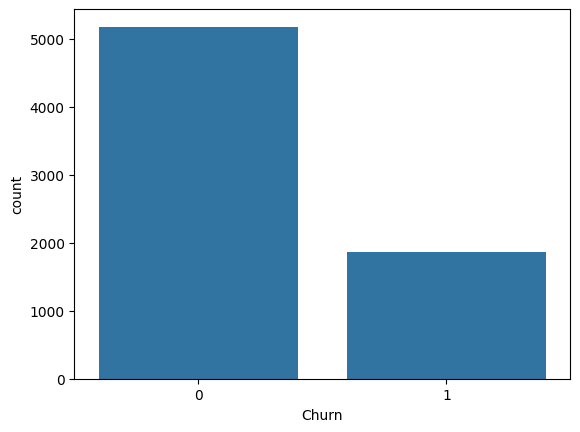

In [7]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [8]:
!pip install -U imbalanced-learn

In [9]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [10]:
# rom imblearn.over_sampling import SMOTE

# smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
# X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [11]:
# dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
# dados_final.head(2)

In [12]:
# ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

### <span style="color:pink; font-weight:bold"> Metodo baseado na proximidade (KNN)</span>

1. Receber as informações  
2. Calcular as distâncias  
3. Ordenas da menor distância para a maior  
4. Fazer uma contagem da classes  
5. Classificar a partir dos K-vizinhos  
6. Definir o churn


In [13]:
# biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [14]:
# chamando a função de normalização: pega cada um dos atributos do conjuntos x, subtrai a media e divide pelo desvio padrão.

norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.03453023, -0.65401193, -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [ 1.03453023,  1.5290241 , -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 1.03453023, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
        -0.54480692,  1.88720123]])

In [15]:
X_normalizado[0]  # todas as features na mesma escala

array([ 1.03453023, -0.65401193, -3.05401039,  0.8297975 , -0.43991649,
       -1.27744458, -1.17298785, -0.96332984,  3.05401039, -0.85417615,
        1.38171215, -0.88565976, -0.52592737,  1.00669571, -0.52592737,
       -0.63393298, -0.88361972, -0.52592737,  1.3782406 ,  1.12942721,
       -0.52592737, -0.72396752,  1.0138687 , -0.52592737, -0.63943864,
        1.2273572 , -0.52592737, -0.79013171,  1.23648892, -0.52592737,
       -0.79607014, -0.56297505,  0.90418382, -0.51424938, -0.52504733,
        1.40641839, -0.54480692, -0.5298852 ])

#### Distância Euclidiana ####
$$ \sqrt{\sum_{i=1}^{k}(a_i-b_i)²}$$

In [16]:
import numpy as np

### Implementando o modelo

In [17]:
# biblioteca para divisão de dados
from sklearn.model_selection import train_test_split

In [18]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

Treino e teste

In [19]:
# biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos
knn = KNeighborsClassifier(metric='euclidean')

In [21]:
#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [22]:
# testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [23]:
predito_knn

array([0, 0, 0, ..., 0, 0, 0])

### <span style="color:pink; font-weight:bold"> Metodo probabilístico (Naive Bayes)</span>

O que é Naive Bayes:
Príncipio da independência condicional  
A sua base diz que cada uma das características utilizadas por uma  
determinada classe contribuíram de forma independente entre si, para que essa classe fosse determinada. 

Verossimilhança mede a probabildiade de uma determinada característica acontecer  

o teorema quer prever a probabilidade a posteriori: a probabilidade de uma determinada classe  
ocorrer sendo que um conjunto de caracteristicas ocorreu.

In [24]:
X_treino

array([[-0.96662231, -0.65401193, -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231,  1.5290241 ,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [ 1.03453023,  1.5290241 ,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 1.03453023,  1.5290241 , -3.05401039, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ]])

In [25]:
y_treino

1479    0
2377    0
6613    0
6468    0
2668    1
       ..
5218    0
4060    0
1346    1
3454    0
3582    0
Name: Churn, Length: 4930, dtype: int64

In [26]:
# escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
np.median(X_treino)

-0.5259273725834717

In [27]:
# biblioteca ára criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [28]:
# criamos o modelo
# bnb = BernoulliNB(binarize=-0.44)

In [29]:
# bnb.fit(X_treino, y_treino)

In [30]:
# predito_Bnb = bnb.predict(X_teste)

In [31]:
# predito_Bnb

### <span style="color:pink; font-weight:bold"> Método simbólico (árvore de decisão)</span>

Critérios de divisão de nós:  
Índice Gini; + utilizado  
Qui-QUadrado;  
Ganho de informação (entropia); + utilizado  
Redução na variância

In [32]:
# biblioteca para criarmos o modelo de machine learning

from sklearn.tree import DecisionTreeClassifier

In [33]:
# instância do modelo (criar uma variavel para armazenar esse modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [34]:
#treinar o modelo

dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [35]:
# verificar a importância de cada atributo
dtc.feature_importances_

array([0.03953142, 0.02949337, 0.00187419, 0.03502816, 0.02584568,
       0.23801078, 0.18117237, 0.00984846, 0.00265294, 0.01380477,
       0.        , 0.05076853, 0.        , 0.00857815, 0.        ,
       0.00831049, 0.01301688, 0.        , 0.01034152, 0.01234834,
       0.        , 0.01278657, 0.01503465, 0.        , 0.01412551,
       0.0099834 , 0.        , 0.00476743, 0.01066156, 0.00112105,
       0.00775598, 0.00489497, 0.16346053, 0.00360656, 0.01408447,
       0.0213225 , 0.01680614, 0.01896264])

In [36]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [37]:
predito_ArvoreDecisao


array([0, 0, 0, ..., 1, 0, 0])

### <span style="color:pink; font-weight:bold"> Validação dos modelos</span>

#### <span style="color:pink; font-weight:bold"> Matriz de confusão</span>

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
print(confusion_matrix(y_teste, predito_knn))

[[1311  212]
 [ 319  271]]


In [40]:
# print(confusion_matrix(BNb))

In [41]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1269  254]
 [ 312  278]]


#### <span style="color:pink; font-weight:bold"> Acurácia</span>

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
print(accuracy_score(y_teste, predito_knn)*100)

74.86985328916232


In [44]:
# print(accuracy_score(y_teste, predito_BNb)*100)

In [45]:
print(accuracy_score(y_teste, predito_ArvoreDecisao)*100)

73.21344060577378


#### <span style="color:pink; font-weight:bold"> Precisão</span>

In [46]:
from sklearn.metrics import precision_score

In [47]:
print(precision_score(y_teste, predito_knn)*100)

56.10766045548654


In [48]:
# print(precision_score(y_teste, predito_BNb)*100)

In [49]:
print(precision_score(y_teste, predito_ArvoreDecisao)*100)

52.255639097744364


#### <span style="color:pink; font-weight:bold"> Recall</span>

In [50]:
from sklearn.metrics import recall_score

In [51]:
print(recall_score(y_teste, predito_knn)*100)

45.932203389830505


In [52]:
# print(recall_score(y_teste, predito_BNb)*100)

In [53]:
print(recall_score(y_teste, predito_ArvoreDecisao)*100)

47.11864406779661


In [54]:
print('Modelo KNN:', precision_score(y_teste, predito_knn))
# print('Modelo Bernoulli de Naive Bayes:', precision_score(y_teste, predito_BNb))
print('Modelo Àrvore de Decisão:', precision_score(y_teste, predito_ArvoreDecisao))


Modelo KNN: 0.5610766045548654
Modelo Àrvore de Decisão: 0.5225563909774437
